# NGS文库质量控制

******

## [目录](目录)

[1.获取数据](https://www.ncbi.nlm.nih.gov/sra/SRR1039523/)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1SRA](#1.1-SRA)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.2下载SRA数据](#1.2下载SRA数据)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.3其余下载方式](#1.3其余下载方式)<br>
[2.数据格式](#2.数据格式)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1FASTA文件](#2.1-FASTA文件)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2FASTQ文件](#2.2-FASTQ文件)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3单端测序和双端测序](#2.3-单端测序和双端测序)<br>
[3.质量控制](#3.质量控制)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1质量评估](#3.1-质量评估)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1使用FastQC评估质量](#-3.1.1-使用FastQC评估质量)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2使用MultiQC整合报告](#3.1.2-使用MultiQC整合报告)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2去除adapter](#3.2-去除adapter)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3质量过滤](#3.3-质量过滤)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.1trimmomatic](#3.3.1-trimmomatic)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.2trim-galore](#3.3.2-trim_galore)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.3fastp](#3.3.3-fastp)<br>
[4.完整代码](#4.完整代码)<br>
[5.输出文件](#5.输出文件)<br>
[6.自主练习](#6.自主练习)<br>
[参考文献](#参考文献)<br>

******

<h2 id="1">1.获取数据</h2>

<h3 id="1.1" href="1.1">1.1 SRA</h3>

> 📰扩展阅读 <br>
> 1.[SRA数据库及其数据的下载（GEO、SRA）.简书.2020-01-28](https://www.jianshu.com/p/beb47b89c1d3) <br>
> 2.[NCBI SRA数据库使用详解.博客.2018-08-23](https://www.cnblogs.com/lyyao/p/9526314.html) <br>
> 上面两篇帖子里详细介绍了SRA数据库及其使用方法

<h3 id="1.2">1.2下载SRA数据</h3>

通过以下四步便可以下载自己感兴趣的任何SRA数据：
+ 阅读文章，并获取文章的GSE号（以ASM数据[[1]](#参考文献)GSE52778为例）；
+ 在NCBI数据库检索GSE号，检索类目为GEO或All datasets，便可获得研究的详情页面，并从页面获取SRP号；
+ 点击SRP号，进入数据列表，点击进入数据页可以看到以下内容：
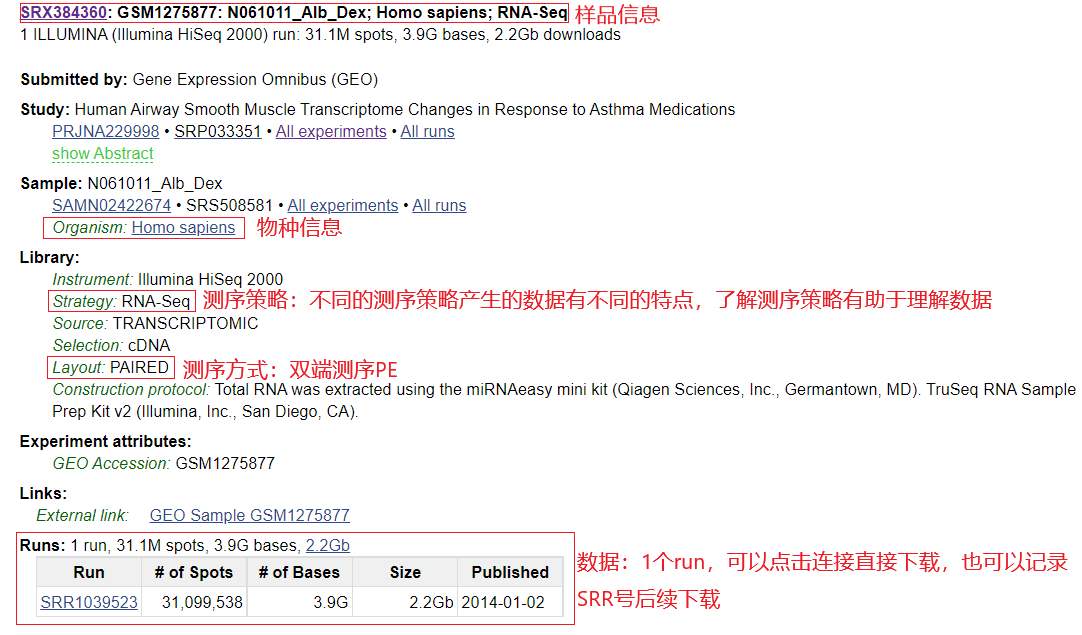
+ 在终端使用以下代码下载FASTQ格式的数据，单端测序每个文库只返回一个FASTQ文件，双端测序两个FASTQ文件，左端一般命名为_1或R1，右端命名为_2或R2。

In [ ]:
#下载ASM数据
$ nohup fastq-dump -v --split-3 --gzip SRR1039523    #下载单个SRR数据
$ nohup fastq-dump -v --split-3 --gzip SRR1039523 &  #当数据较多时使用&连接操作
$ nohup fastq-dump -v --split-3 --gzip SRR1039522
##注意：以上下载过程中融合了下载SRA文件和将SRA文件转FASTQ文件两步，因此会在~/ncbi下面存在缓存的SRA文件，应定时清空

<h3 id="1.3">1.3其余下载方式</h3>

处理使用fastq-dump以外，还可以使用以下两种方式下载数据：
+ 使用prefetch下载 <br>
由于ASM数据均为双端，因此所有单端操作的例子使用CBAmC数据[[2]](#参考文献)，SRR8956151。prefetch的下载安装方式以及使用细节见扩展阅读1。

In [ ]:
$ prefetch -c  SRR1039523                                       #检查序列号是否可以下载
$ prefetch SRR1039523                                           #下载单个SRR:PE数据
$ prefetch SRR8956151                                           #下载单个SRR:SE数据
$ prefetch --option-file   ./data/ASM/sra.ids                   #批量下载,sra.ids是存储的SRR ID，一行一个SRR编号
$ ls  ~/ncbi                                                    #所有文件都存放在home目录下的默认文件下
$ fastq-dump SRR8956151.sra -O ./data/CBAmC                       #单端SRA转FASTQ文件
$ fastq-dump --fasta SRR8956151.sra -O ./data/CBAmC               #单端SRA转FASTA文件
$ fastq-dump SRR1039523.sra --split-3 -O ./data/ASM             #双端SRA转FASTQ文件
$ fastq-dump SRR1039523.sra --split-3 --gzip -O ./data/ASM      #双端SRA转FASTA文件

+ 使用Aspeara下载NCBI和ENV数据<br>
Aspeara的下载安装方式以及经常遇到的问题和解决方案见扩展阅读2。

In [ ]:
#1.单个文件下载
$ ascp -k 1 -QT -l 100M -i ~/.aspera/connect/etc/asperaweb_id_dsa.openssh -T anonftp@ftp-private.ncbi.nlm.nih.gov:/sra/sra-instant/reads/ByRun/sra/SRR/SRR103/SRR1039523/SRR1039523.sra .
##其中-k 1 表示断点续传；-QT 100M 表示提高下载速度；-i 表示密钥文件路径；-T 表示要下载的SRA数据路径（可以通过浏览器文件浏览自行查找自己数据的SRA路径）
##需要注意的是命令末尾的 .
#2. 批量下载
$ ascp -i ~/.aspera/connect/etc/asperaweb_id_dsa.putty --mode recv --host ftp-private.ncbi.nlm.nih.gov --user anonftp   --file-list ./data/ASM/aspera_download.txt
##aspera_download.txt用于存储SRA数据地址，每行一个地址

>📰扩展阅读：<br>
> 1) [SRA Toolkit - prefetch 快速下载NCBI SRA数据.简书.2019-04-30](https://www.jianshu.com/p/d1abdced8bcd) <br>
> 2) [详解Linux 下 Aspera 获取基因组数据.知乎.2018-12-31](https://zhuanlan.zhihu.com/p/40751860)

******

<h2 id="2">2.数据格式</h2>

<h3 id="2.1">2.1 FASTA文件</h3>

FASTA文件用于存储NGS测序数据，每条记录由两行内容构成，是FASTQ格式数据的前两行内容，详细参见FASTQ文件介绍。

<h3 id="2.2">2.2 FASTQ文件</h3>

通常，NGS测序实验中产生的短读长的核苷酸序列和质量使用 FASTQ 格式存储在纯文本文件中。FASTQ文件中，每四行为一个完整记录，每个记录代表一个read的所有信息。在一个记录中，每行的含义如表格1。其中第四行称为质量得分字符串（其长度和第二行的序列长度一致），每一个字母代表着这个位置碱基的质量分（见序列质量对照表），这个数值越大代表测得的碱基准确度越高，其对应关系见表格2。我们希望用于后续分析的序列是具有较高准确性的，以免产生不必要的错误或无法解释的结果，但是按照Illumina测序平台的碱基质量计算公式，碱基错误率最高可达100%，因此，所有基于序列的分析首先要对序列进行质量控制。data文件夹中已经保存了测试数据，在终端可以通过以下代码滚动查看FASTQ文件数据，按<kbd>Ctrl</kbd>+<kbd>Z</kbd>退出查看。
> 🔗参考资料：<br>
> [1][FASTA and FASTQ formats.Computational Genomics with R.2020-09-30](https://compgenomr.github.io/book/fasta-and-fastq-formats.html)<br>
> [2][FastQC for quality assessment.hbctraining.2021](https://hbctraining.github.io/Intro-to-ChIPseq/lessons/02_QC_FASTQC.html)

In [ ]:
$ less ./data/ASM/clean_data/KO_FO1_R1.fastq

* 表格1 <br>
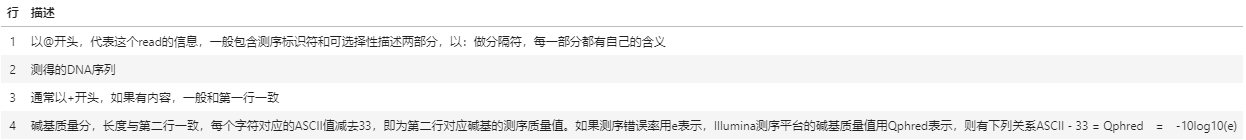
+ 表格2 <br>
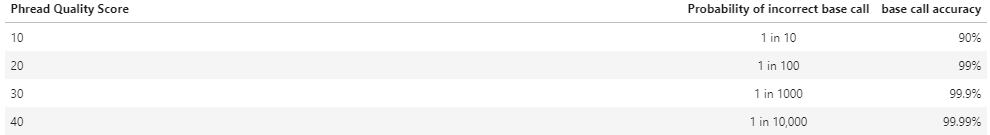
+ 序列质量对照表 <br>
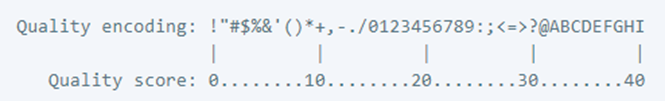


<h3 id="2.3">2.3 单端测序和双端测序</h3>

单端和双端可以理解为两种测序文库的构建方法。<br><font color="red">📌注意：许多工具针对不同的测序方法（SE、PE）使用不同的参数，因此一定要先确定SE还是PE再计算！！</font> <br>
+ 单端测序：只沿一个固定方向对文库进行测序。
+ 双端测序：分别从两个方向对一组互补链或一个单链进行同时测序。

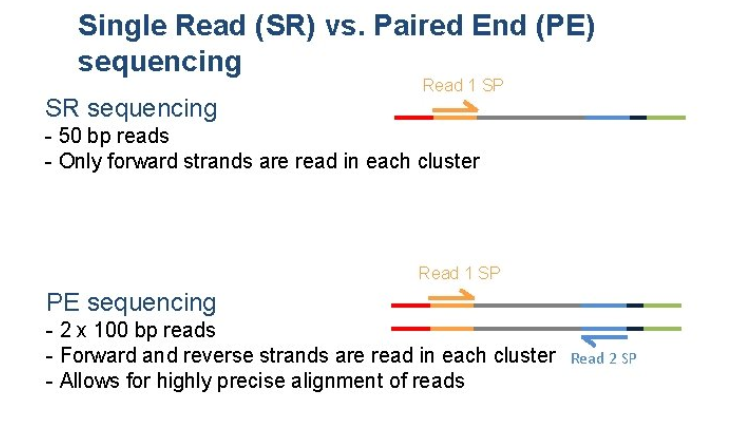
> 🔗图片来自：[DNA Sequencing Second generation techniques Hardison Genomics 32](https://slidetodoc.com/dna-sequencing-second-generation-techniques-hardison-genomics-32/)

******

<h2 id="3">3.质量控制</h2>

数据质量控制是保证分析结果正确性和可信度的必要手段，在每一步决策性分析之前都应对输入数据进行质量控制，这样不仅可以减少不必要的计算量，还可以增加结果的可信度。比如，在序列比对前对原始数据进行质量控制、在比对结束后对比对质量进行控制、在单细胞数据分析前对细胞表达矩阵进行质量控制等。当前教程主要聚焦在NGS文库质量控制上，这一步几乎是所有NGS序列分析的初始步骤。

<h3 id="3.1">3.1 质量评估</h3>

简单来说，质量控制就是过滤掉数据中的低质量部分，仅保留高精确度、高质量的数据进行分析。对于NGS测序数据，可以使用FastQC进行质量评估。对于多个样本的情形，可以使用MultiQC合并多个FastQC报告，以便比较查看。

<h4 id="3.1.1"> 3.1.1 使用FastQC评估质量</h4>

使用FastQC[[3]](#参考文献)评估质量是简单易行的（参考以下代码段），重点是报告解读。

In [ ]:
#1.安装FastQC
##已安装则不用运行！！
$ wget http://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.7.zip | unzip fastqc_v0.11.7.zip
#2.查看帮助信息
$ fastqc --help
#3.对于SE数据
$ fastqc -o ./result/fastqc_result  -t 10 ./data/CBAmC/KO_FO1_R1.fastq.gz
#4.对于PE数据
$ fastqc -o ./result/fastqc_result  -t 10 ./data/ASM/raw_data/KO_FO1_R1.fastq.gz ./data/ASM/raw_data/KO_FO1_R2.fastq.gz

FastQC一般使用以下10个指标来评估数据质量：
+ per base  sequence quality：每位碱基的质量分，分值越高质量越好；<br>
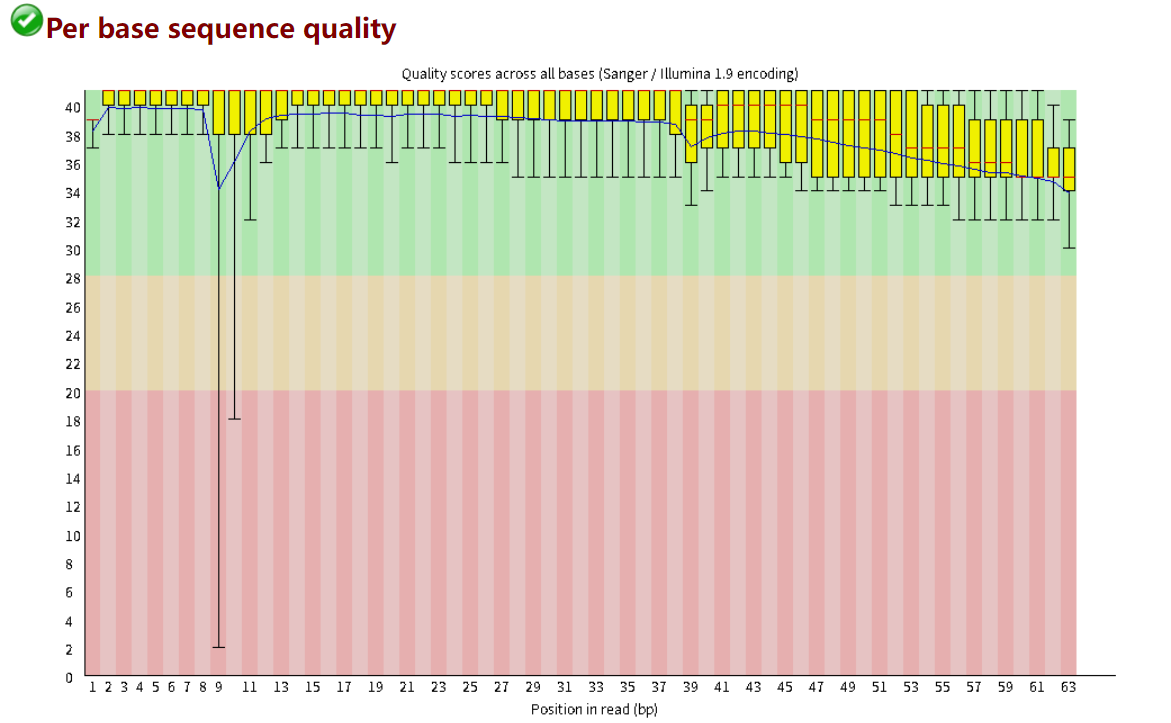
+ per sequence quality scores：每个reads的质量分，分值越高的reads质量越好；<br>
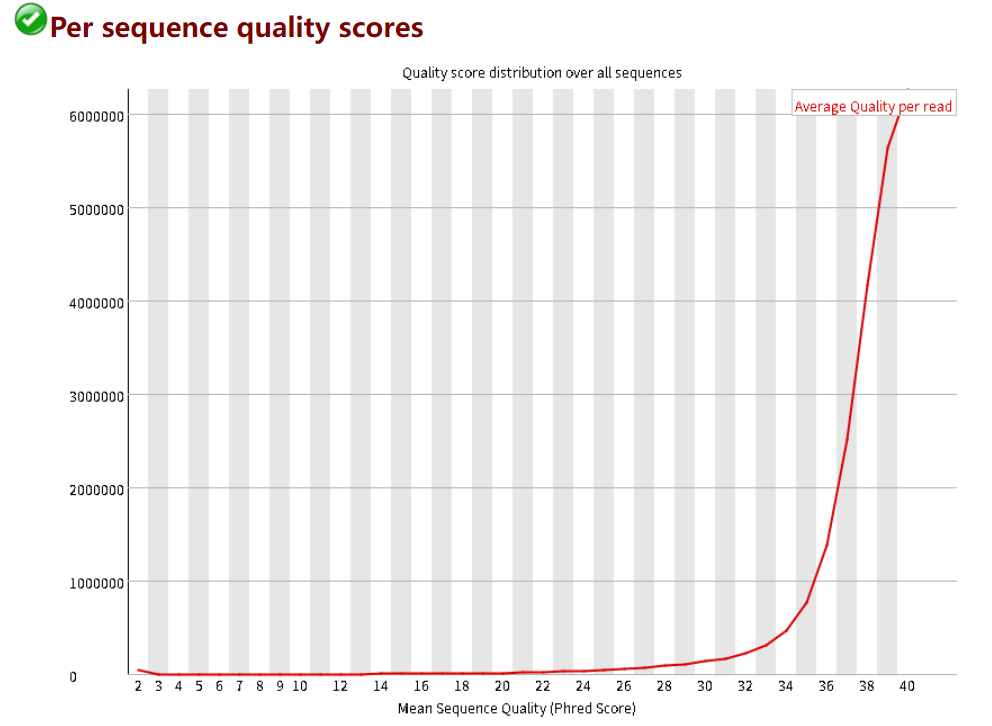
+ per base sequence content：每个位点处的碱基构成，理想情况下，各曲线应相互平行；<br>
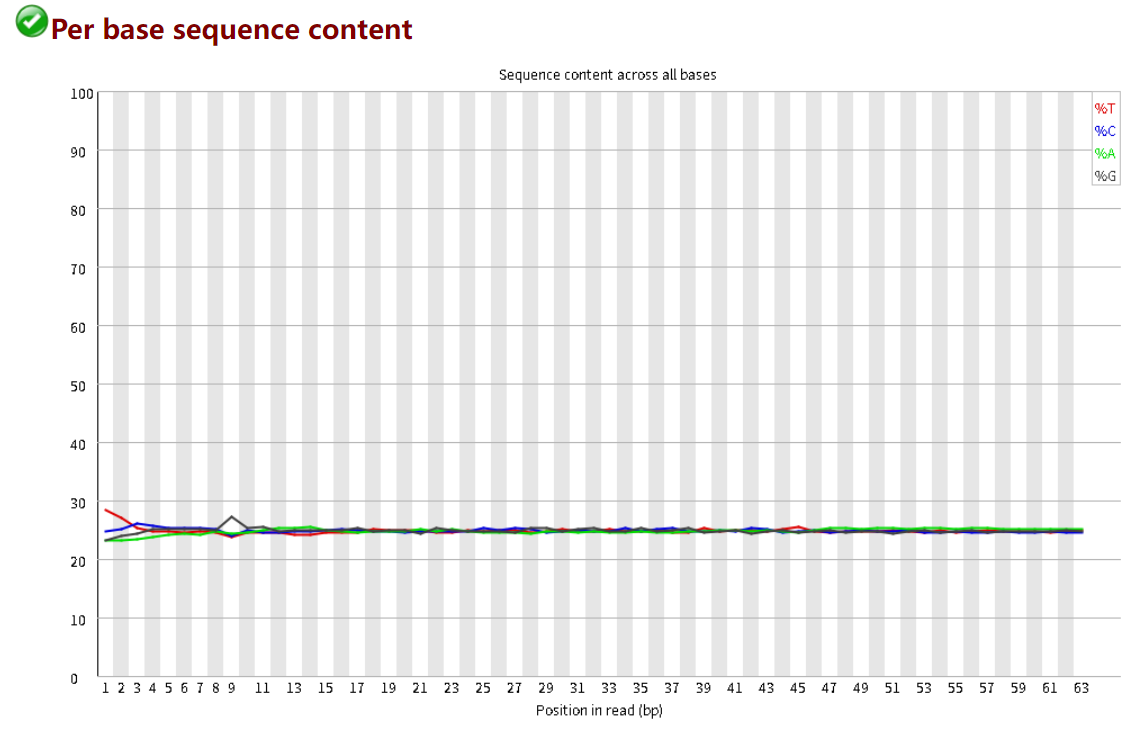
+ per sequence gc content：序列GC含量分布，正常情况下，序列的GC碱基含量应当满足正态分布；<br>
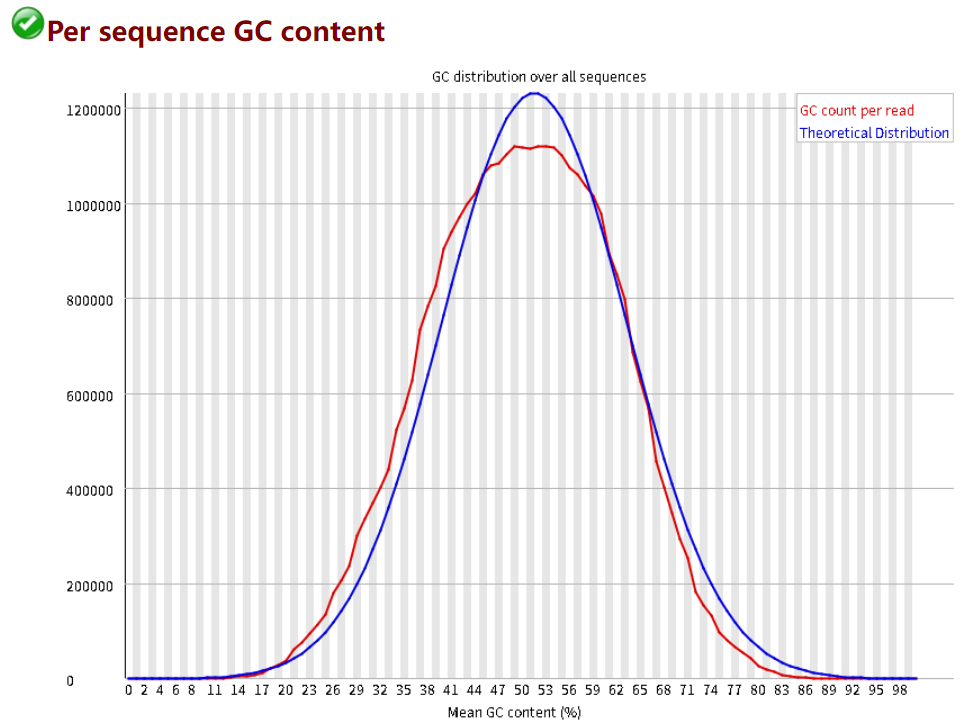
+ perl base N content： N碱基比例，当测序仪无法确定某位点的碱基类型时降之标记为N，因此N碱基含量越低序列质量越高；<br>
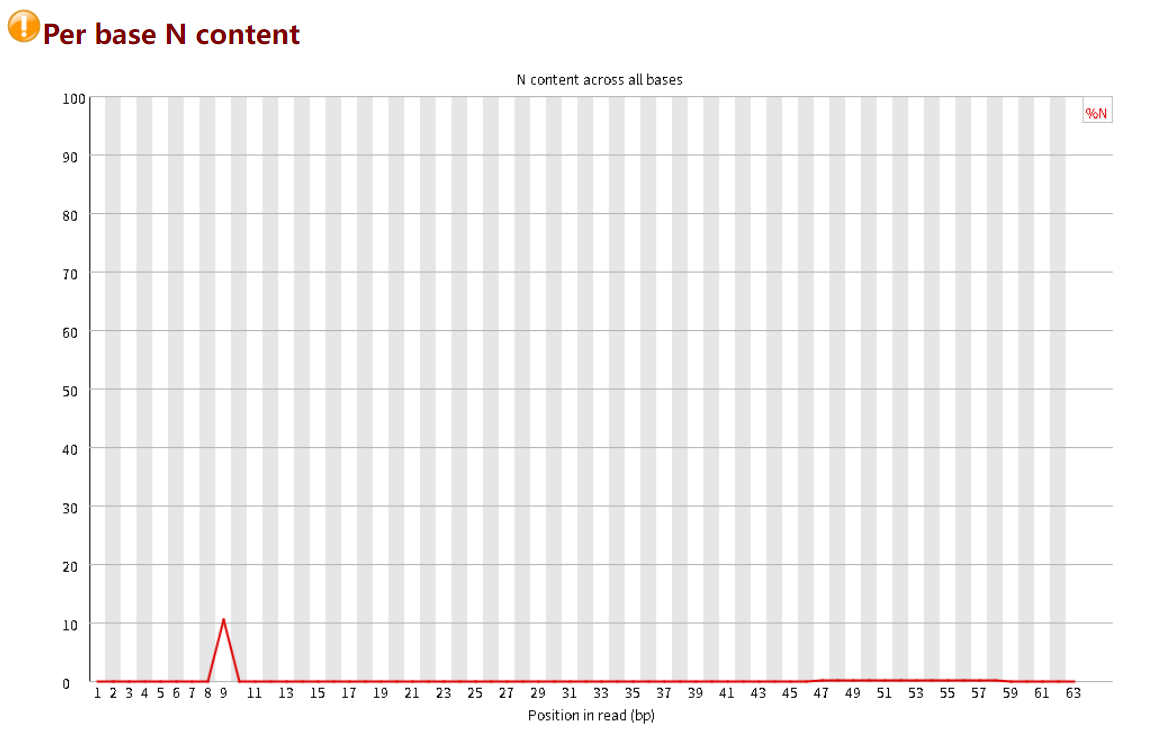
+ sequence length distribution： 序列长度分布，一般序列长度都是一样的；<br>
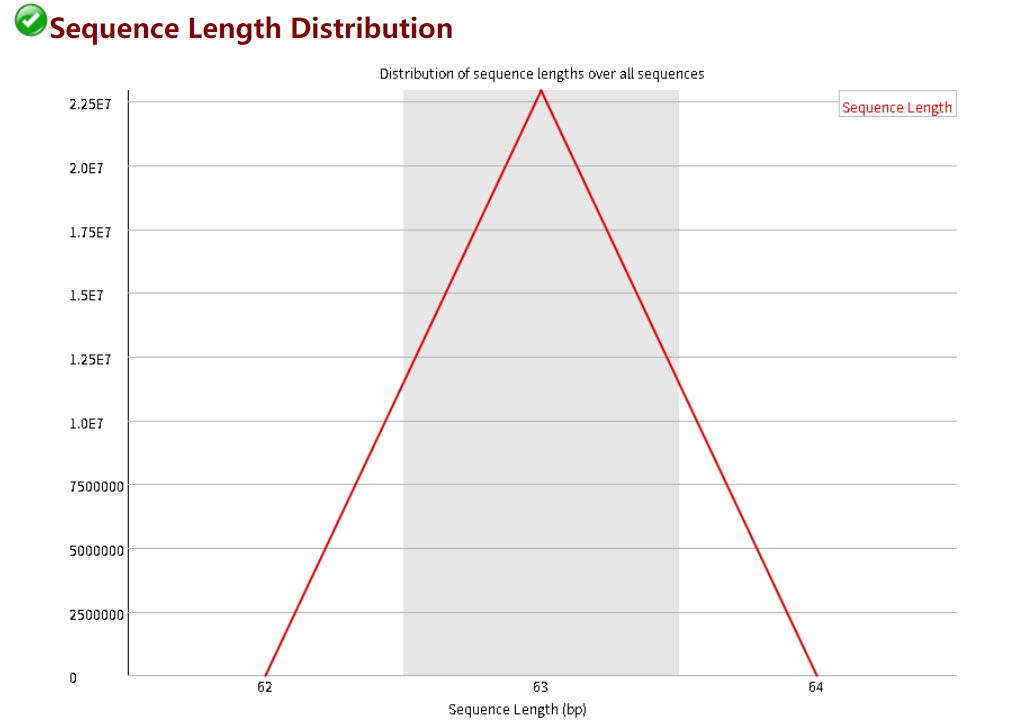
+ Duplicate sequences：重复序列分布，基因组覆盖度越高，测序得到的序列重复比例会越低；在文库构建过程中，如果某些片段PCR扩增的比例大于随机扩增的比例，会导致重复序列比例高；<br>
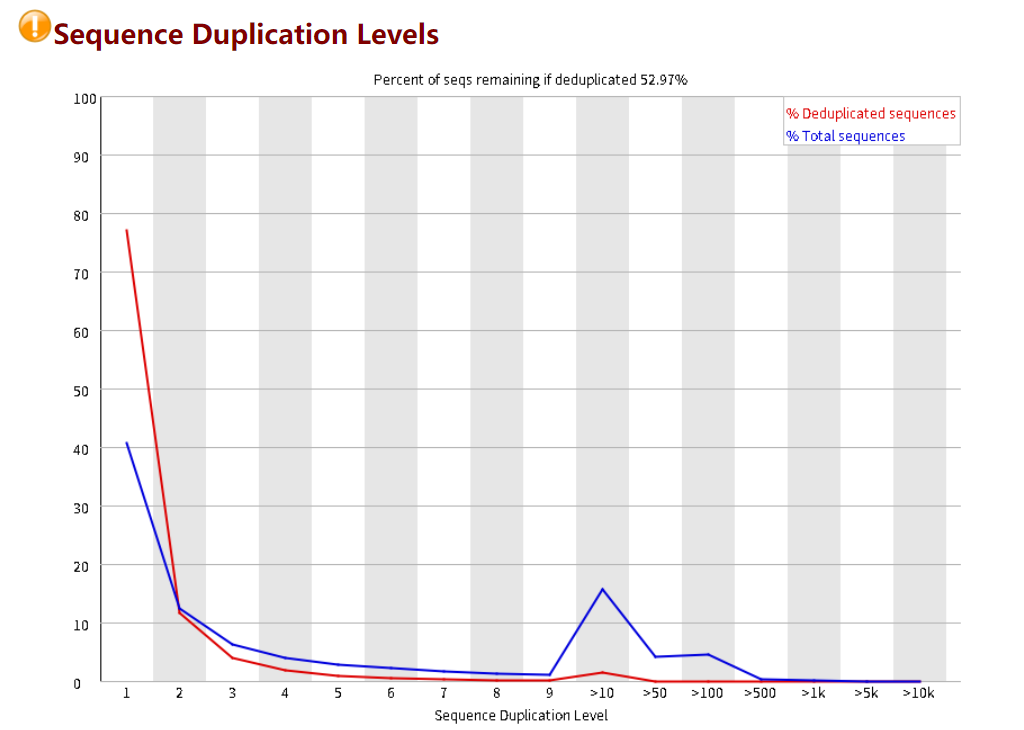
+ overrepresented sequencs：过表达序列的情况，过表达序列可能是引物二聚体，污染序列等异常情况，也有可能是基因组上存在的具有生物学意义的片段。需要根据实际情况加以区分；<br>
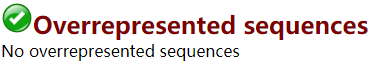
+ adapter content：adapter是测序时在待测序列两头人为添加的片段，通常大于30bp。5’端的adapter测序时是不测到的，3’端有可能当测序序列长度大于insert片段时，会测到3’ adapter。当测到的adapter超过5bp时，就需要用工具去掉。目前主流的双端测序数据，adapter序列都是出现在3’端，R1序列的3’端可能出现3’adapter 序列，R2端序列的3’端会出现5’端adpter的反向互补序列；<br>
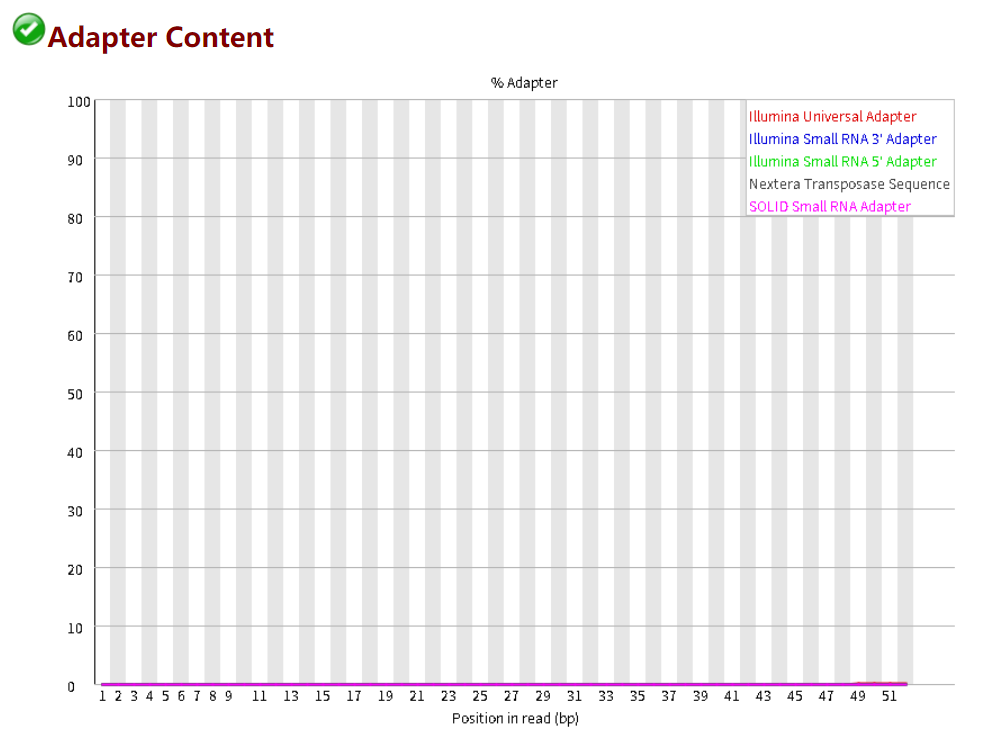
+ per tile sequence quality：只有illumina测序平台的数据才会给出这部分内容，对于每个tile的测序质量，用热图进行展示，热图的颜色从蓝色过滤到红色，蓝色表明该tile的测序质量好，红色表明该tile的测序质量差，一个良好的测序结果中，基本上全部是蓝色。<br>
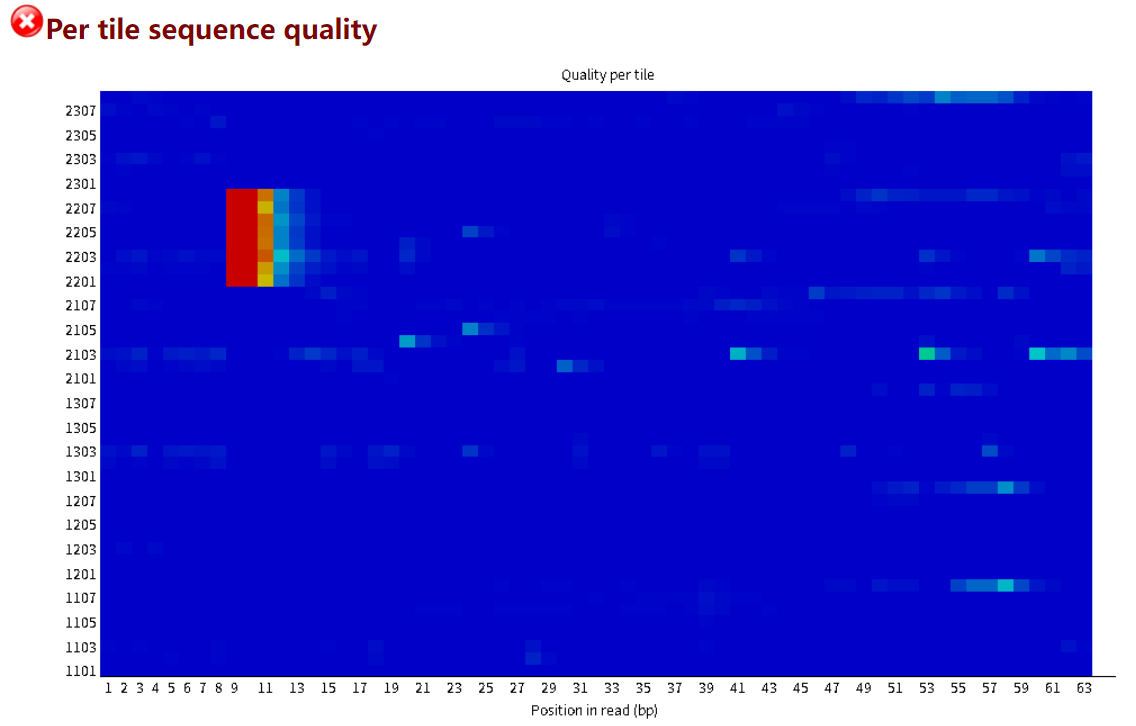

> 📑完整报告参见./result/fastQC_result_example.html

FastQC给出的报告会详细描述上述10个指标，并使用红色、黄色、绿色三种底色标记指标的合格情况，其中红色表示不合格、黄色表示警告、绿色表示合格。根据报告情况，我们可以选择对应的方法来剔除异常数据。部分异常是实验失败导致的，这仅凭数据过滤是无法改善的，但绝大部分异常是误差导致的，这部分异常是可以手动清除的。在后续章节种，我们会举例几个较常用的清除误差导致的异常数据的方法。除了FastQC以外，还有很多用于质控的软件，比如Qualimap 和RSeQC等，感兴趣可以自行学习。

<h4 id="3.1.2">3.1.2 使用MultiQC整合报告</h4>

[MultiQC](https://multiqc.info/)[[4]](#参考文献)可以将多种工具针对单个样本数据产生的多个报告整合起来，方便比较和查看。MultiQC支持多种分析类型（如：RNAseq、Whole-Genome Seq、Bisulfite Seq、Hi-C和MultiQC_NGI），支持111种工具产生的报告（如：FastQC、STAR、cutadapt等）。以FastQC为例，下面的代码块展示了如何将多个样本单独的FastQC报告整合成一个可交互的MultiQC报告：

In [ ]:
#1.下载
$ pip install multiqc
#2.查看用法
$ multiqc -h
#3. 整合FastQC的报告
$ multiqc ./data/example_fastqc_results -o ./result/multiqc_result  #其中第一个路径是FastQC的输出路径，第二个是用于存放MultiQC结果的路径
$ multiqc path/to/qualimap_report -i name -o output/Dir -m qualimap #其余工具报告整合的例子，-m参数指定要合并的报告来源工具

MultiQC的输出报告部分展示如下(其中第二张图将所有样本的所有指标合格情况使用热图展示出来，结果一目了然)，它将所有样本的FastQC结果都整合到一起：<br>
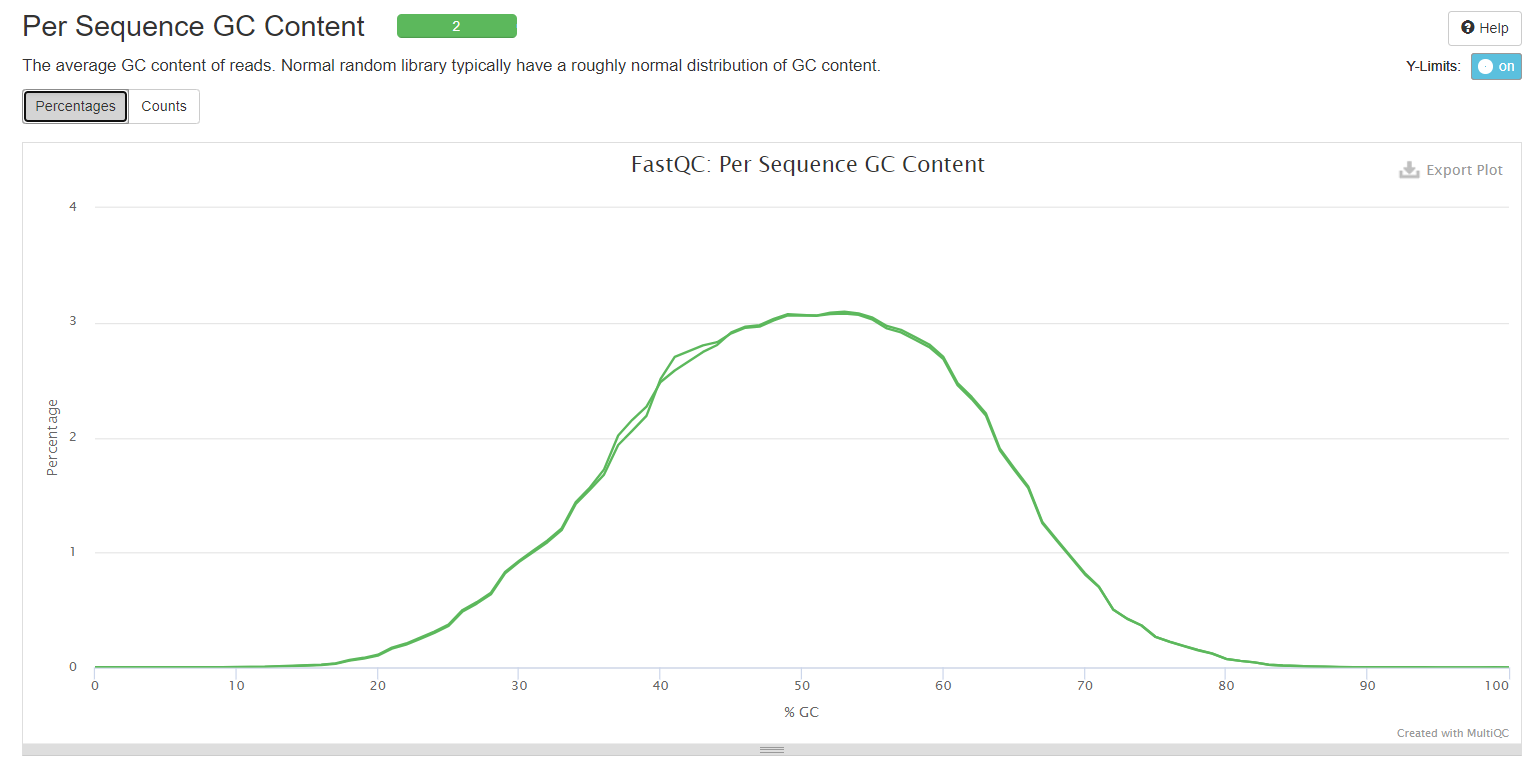
> 📑完整报告见./result/multiqc_result/multiqc_report.html

<h3 id="3.2">3.2 去除adapter</h3>

对于质量评估中adapter含量过高的数据，可以使用[cutadapt](https://cutadapt.readthedocs.io/en/stable/)去除序列中的adapter。cutadapt 是一款对NGS数据进行质量过滤的软件，无论是5’端adapter,还是3’端adapter, 都可以有效的去除，同时也可以过滤低质量，去除长度太短的序列。

In [ ]:
#1.下载
$ pip install cutadapt
#2.去除3’端adapter序列
$ cutadapt -a AACCGGTT -o ./result/cutadapt_result/KO_FO1_R1_clean.fastq ./data/ASM/KO_FO1_R1.fastq     #其中，AACCGGTT代表adapter序列
#3.去除5’端adapter序列
$ cutadapt -g AACCGGTT -o ./result/cutadapt_result/KO_FO1_R1_clean.fastq ./data/ASM/KO_FO1_R1.fastq
#4.Anchored模式：在该模式下，仅去除完整的adapter序列，而忽视其子序列
$ cutadapt -a AACCGGTT$ -o ./result/cutadapt_result/KO_FO1_R1_clean.fastq ./data/ASM/KO_FO1_R1.fastq    #3’端Anchored模式
$ cutadapt -g ^AACCGGTT -o ./result/cutadapt_result/KO_FO1_R1_clean.fastq ./data/ASM/KO_FO1_R1.fastq    #5’端Anchored模式
#5.错配：由于测序本身存在误差，因此测得的adapter也不一定完全和标准序列一致，因此可以通过-e参数设置允许的错配比例,使用-no-indels参数来禁止插入和缺失
$ cutadapt -g AACCGGTT -e 0.2 -o ./result/cutadapt_result/KO_FO1_R1_clean.fastq ./data/ASM/KO_FO1_R1.fastq
#6.对于PE数据
$ cutadapt -a ADAPTER_FWD -A ADAPTER_REV -o ./result/cutadapt_result/KO_FO1_R1_clean.1.fastq -p ./result/cutadapt_result/KO_FO1_R2_clean.2.fastq ./data/ASM/KO_FO1_R1.fastq ./data/ASM/KO_FO1_R2.fastq

除了去除adapter以外，cutadapt还可以进行许多过滤操作：<br>
+ --minimum-length LENGTH 或者 -m LENGTH ：丢弃比 LENGTH 短的已处理reads；
+ --maximum-length LENGTH 或者 -M LENGTH ：丢弃长于 LENGTH 的已处理reads；
+ --untrimmed-output FILE ：将所有没有adapter的reads写入FILE（以 FASTA/FASTQ 格式），而不是将它们写入常规输出文件；
+ --max-n COUNT_or_FRACTION ：丢弃超过 COUNT个N碱基的reads；
+ --max-expected-errors ERRORS 或者 --max-ee ERRORS ：丢弃超过 ERRORS 预期错误的reads;
+ cutadapt --nextseq-trim=20 -o out.fastq input.fastq : 使用two-color chemistry (NextSeq)对reads进行质量过滤。

<h3 id="3.3">3.3 质量过滤</h3>

对于质量评估中，质量较低的reads和碱基，可以使用多种工具进行过滤，比如[trimmomatic](http://www.usadellab.org/cms/?page=trimmomatic)、[trim_galore](https://www.bioinformatics.babraham.ac.uk/projects/trim_galore/)和[fastp](https://github.com/OpenGene/fastp)

<h4 id="3.3.1">3.3.1 trimmomatic</h4>

trimmomatic[[5]](#参考文献)采用滑动窗口的方式去除低质量序列，需要指定滑动窗口的大小和平均质量的阈值，通过SLIDINGWINDOW参数指定，写法如下：SLIDINGWINDOW:4:15。第一个数字4代表滑动窗口的大小为4bp,第二个数字15代表碱基质量阈值为15。如果窗口内4个碱基的平均质量值低于15，该窗口及之后的序列都会被去除。trimmomatic使用不同参数控制不同功能：
+ 去除reads 5’端的低质量碱基: LEADING:3;
+ 去除reads 3’端的低质量碱基: TRAILING:3;
+ 从序列头部切除指定长度的碱基：HEADCROP:5；
+ 将序列切割成指定长度：CROP:120；
+ 去除长度过短的序列：MINLEN:36；
+ 去除低质量序列：SLIDINGWINDOW:4:15；

In [ ]:
#1.PE数据的基本用法
$ java -jar trimmomatic-0.35.jar PE -phred33 input_forward.fq.gz input_reverse.fq.gz output_forward_paired.fq.gz output_forward_unpaired.fq.gz output_reverse_paired.fq.gz output_reverse_unpaired.fq.gz ILLUMINACLIP:TruSeq3-PE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36
##实例
$ java -jar trimmomatic-0.35.jar PE -phred33 ./data/ASM/KO_FO1_R1.fq.gz ./data/ASM/KO_FO1_R2.fq.gz ./result/trimmomatic_result/KO_FO1_R1_clean_paired.fq.gz ./result/trimmomatic_result/KO_FO1_R1_clean.fq.gz ./result/trimmomatic_result/KO_FO1_R2_clean_paired.fq.gz ./result/trimmomatic_result/KO_FO1_R2_clean.fq.gz ILLUMINACLIP:TruSeq3-PE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36
#2.SE数据的基本用法
$ java -jar trimmomatic-0.38.jar SE -phred33 ./data/CBAmC/KO_FO1_R1.fastq ./result/trimmomatic_result/KO_FO1_R1_clean.fq.gz ILLUMINACLIP:TruSeq3-SE:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36

<h4 id="3.3.2">3.3.2 trim_galore</h4>

cutadapt软件可以对NGS数据进行质量过滤，FastQC软件可以查看NGS数据的质量分布，trim_galore将这两个软件封装到一起，使用起来更加的方便。

In [ ]:
#1.安装
##由于trim_galore是cutadapt和FastQC的整合，因此需要首先安装cutadapt和FastQC并且可执行文件位于PAH环境变量定义的路径中，然后：
$ wget https://github.com/FelixKrueger/TrimGalore/archive/0.5.0.tar.gz
$ tar xzvf 0.5.0.tar.gz
#3.PE数据的基本用法
$ trim_galore --paired --quality 20 -a AGATCGGAAGAGC   -a2 AGATCGGAAGAGC --length 20  -o ./result/trim_galore  ./data/ASM/KO_FO1_R1.fq.gz ./data/ASM/KO_FO1_R2.fq.gz
#3.SE数据的基本用法
$ trim_galore  --quality 20 -a AGATCGGAAGAGC --length 20  -o ./result/trim_galore  ./data/CBAmC/KO_FO1_R1.fastq

<h4 id="3.3.3">3.3.3 fastp</h4>

相比传统的QC工具，fastp有两个主要特点，第一个就是运行速度快，第二个就是提供了质控前后数据详细统计结果。对fastp的功能简要概述如下：
+ 去除adapter 序列：默认查找并去除序列中的adapter，但是也可通过--adapter_sequence参数手动指定SE数据的adapter序列或通过--adapter_sequence和--adapter_sequence_r2指定PE数据的adapter序列。如果不希望进行去除adapter序列这一步，可以添加-A或者--disable_adapter_trimming参数。
+ 过滤低质量的序列：默认情况下，会过滤掉质量较差的序列，-q参数指定碱基质量的阈值，小于该质量的碱基被认为是低质量的碱基，-u参数指定一条序列中允许的低质量碱基的百分比，取值范围从0-100，如果序列中低质量碱基百分比超过了该阈值，这条序列就会被过滤掉；-n参数指定一条序列中最多允许的N碱基的个数，如果超过这个数值，这条序列会被过滤掉。如果不希望过滤掉低质量序列，可以添加-Q参数。
+ 根据序列长度进行过滤：默认情况下，fastp会根据长度对序列进行过滤，--length_required指定最小长度，小于该长度的reads会被过滤掉;--length_limit指定最大长度，大于该长度的reads也会被过滤掉，如果不希望进行长度过滤，可以添加-L或者--disable_length_filtering参数。
+ 去除低质量的碱基：fastp支持类似trimmomatic滑动窗口的方式，对序列中的低质量碱基进行过滤，但是它的算法运行速度更快。-W参数定义滑动窗口的长度，默认值为4，-M参数定义碱基平均质量的阈值，默认值为20。如果一个窗口内碱基平均质量低于20，该窗口及其之后的碱基都会被过滤掉。默认情况下，是不会去除低质量碱基的，添加-3参数可以利用滑动窗口的方式从reads的3’端去除低质量的碱基。
+ 去除reads两端的部分碱基：fastp支持从reads的3’端和5’端去除固定个数的碱基，对于单端数据，-f指定从5’端去除的碱基数，-t指定从3’端去除的碱基数；对于双端数据，用-f和-F参数分别指定R1序列5’端去除的碱基数，用-t和-T参数分别指定R2序列3’端去除的碱基数。
+ 去除polyG/polyX：fastp支持去除序列3’端的尾巴，只有对于NextSeq/NovsSeq的数据，fastp会自动去除polyG尾，--poly_g_min_len指定ployG的最小长度，-g参数强制对所有数据去除polyG尾，-G参数禁止去除polyG尾。默认情况下，fastp不会去除polyX尾，可以添加-X参数，同时使用--poly_x_min_len指定polyX的最小长度，默认值都为10。
+ 过滤掉低复杂度的序列：fastp支持根据复杂度对序列进行过滤，默认情况下，是不会根据序列复杂度进行过滤的，如果想要进行过滤，需要添加-Y参数，同时使用-y参数指定复杂度的阈值，取值范围0-100， 默认值为30，复杂度低于30%的序列会被过滤掉。
+ 根据index 对序列进行过滤：fastp支持根据index对序列进行过滤， --filter_by_index1参数指定一个index文件，该文件中每行是一个index，如果序列的index在该文件中，这条序列会被过滤掉，--filter_by_index_threshold参数指定实际index序列与检测到的index序列之间的最大错配数。
+ 对双端数据进行校正：通常情况下，reads的3’端质量较差，双端测序的数据，可以根据overlap部分的序列，对低质量的测序结果进行校正。通过添加-c参数，fastp可以校正双端测序的结果，--overlap_len_require参数指定overlap的最小碱基数，--overlap_diff_limit指定overlap区域允许的最大错配数。
+ UMI 预处理：由于文件构建过程中，存在PCR的过程， 会影响定量结果的准确性，最近出现了UMI这样的技术，本质上对未扩增之前的片段进行标记，建库之后，拥有相同UMI标记的reads来自于同一份模板，在数据分析时，可以依据这个标记对序列去冗余，使定量的结果更加准确。fastp支持对UMI标记的序列进行预处理，添加-U参数之后，fastp就可以对UMI数据进行预处理。--umi_loc指定umi 的index 出现的位置，--umi_len指定umi index的长度。
+ 分析过表达序列：在reads中存在的过表达序列可能是adapter序列，分析过表达序列有助于我们发现测序和建库中可能出现的问题，通过添加-p参数可以使fastp进行过表达序列的分析。
>注：1.fastp支持多线程，通过-w参数指定并行的线程数;2.fastp的结果可以使用MultiQC整合。

In [ ]:
#1.下载
$ wget http://opengene.org/fastp/fastp
$ chmod a+x fastp
#3.PE数据的基本用法
$ fastp -i ./data/ASM/KO_FO1_R1.fastq  -o  ./result/fastp_result/R1.clean.fq -I ./data/ASM/KO_FO1_R2.fastq -O ./result/fastp_result/R2.clean.fq  -a ATAGCATCA   -a2  ATAGCATCA  -j ./result/fastp_result/report.json -h ./result/fastp_result/json.html
#2.SE数据的基本用法
$ fastp -i ./data/CBAmC/KO_FO1_R1.fastq  -o ./result/fastp_result/output.fastq  -a  ATAGCATCA  -j ./result/fastp_result/report.json -h ./result/fastp_result/report.html

>👍✨经过以上对raw data的处理，我们就得到了可以直接用于后续比对的clean data。

******

<h2 id="code">4.完整代码</h2>

In [ ]:
#1.下载ASM数据
##使用fastq-dump下载数据（推荐）
$ nohup fastq-dump -v --split-3 --gzip SRR1039523    #下载单个SRR:PE数据
$ nohup fastq-dump -v --split-3 --gzip SRR1039523 &  #当数据较多时使用&连接操作
$ nohup fastq-dump -v --split-3 --gzip SRR1039522
##使用prefetch下载数据
$ prefetch -c  SRR1039523                                       #检查序列号是否可以下载
$ prefetch SRR1039523                                           #下载单个SRR:PE数据
$ prefetch --option-file   ./data/ASM/sra.ids                   #批量下载,sra.ids是存储的SRR ID，一行一个SRR编号
$ ls  ~/ncbi                                                    #所有文件都存放在home目录下的默认文件下
$ fastq-dump SRR1039523.sra --split-3 -O ./data/ASM             #双端SRA转FASTQ文件
$ fastq-dump SRR1039523.sra --split-3 --gzip -O ./data/ASM      #双端SRA转FASTA文件
##使用Aspeara下载数据
###单个文件下载
$ ascp -k 1 -QT -l 100M -i ~/.aspera/connect/etc/asperaweb_id_dsa.openssh -T anonftp@ftp-private.ncbi.nlm.nih.gov:/sra/sra-instant/reads/ByRun/sra/SRR/SRR103/SRR1039523/SRR1039523.sra .
###其中-k 1 表示断点续传；-QT 100M 表示提高下载速度；-i 表示密钥文件路径；-T 表示要下载的SRA数据路径（可以通过浏览器文件浏览自行查找自己数据的SRA路径）
###需要注意的是命令末尾的 .
### 批量下载
$ ascp -i ~/.aspera/connect/etc/asperaweb_id_dsa.putty --mode recv --host ftp-private.ncbi.nlm.nih.gov --user anonftp   --file-list ./data/ASM/aspera_download.txt
###aspera_download.txt用于存储SRA数据地址，每行一个地址
#2.质量评估
##对于PE数据（ASM）
$ fastqc -o ./result/fastqc_result  -t 10 ./data/ASM/raw_data/KO_FO1_R1.fastq.gz ./data/ASM/raw_data/KO_FO1_R2.fastq.gz
##使用MultiQC整合报告
$ multiqc ./data/example_fastqc_results -o ./result/multiqc_result  #其中第一个路径是FastQC的输出路径，第二个是用于存放MultiQC结果的路径
#3.去除adapter
$ cutadapt -a ADAPTER_FWD -A ADAPTER_REV -o ./result/cutadapt_result/KO_FO1_R1_clean.1.fastq -p ./result/cutadapt_result/KO_FO1_R2_clean.2.fastq ./data/ASM/KO_FO1_R1.fastq ./data/ASM/KO_FO1_R2.fastq
#4.质量过滤
##trimmomatic
$ java -jar trimmomatic-0.35.jar PE -phred33 ./data/ASM/KO_FO1_R1.fq.gz ./data/ASM/KO_FO1_R2.fq.gz ./result/trimmomatic_result/KO_FO1_R1_clean_paired.fq.gz ./result/trimmomatic_result/KO_FO1_R1_clean.fq.gz ./result/trimmomatic_result/KO_FO1_R2_clean_paired.fq.gz ./result/trimmomatic_result/KO_FO1_R2_clean.fq.gz ILLUMINACLIP:TruSeq3-PE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36
##trim_galore
$ trim_galore --paired --quality 20 -a AGATCGGAAGAGC   -a2 AGATCGGAAGAGC --length 20  -o ./result/trim_galore  ./data/ASM/KO_FO1_R1.fq.gz ./data/ASM/KO_FO1_R2.fq.gz
##fastp
$ fastp -i ./data/ASM/KO_FO1_R1.fastq  -o  ./result/fastp_result/R1.clean.fq -I ./data/ASM/KO_FO1_R2.fastq -O ./result/fastp_result/R2.clean.fq  -a ATAGCATCA   -a2  ATAGCATCA  -j ./result/fastp_result/report.json -h ./result/fastp_result/json.html

*****

<h2 id="list">5.输出文件</h2>

| 步骤 | 输出文件 |
 :-: | :-: 
| 下载数据 | SRR1039523.sra |
| FastQC评估质量 | KO_FO1_R1.fastq.gz ; KO_FO1_R2.fastq.gz ；KO_FO1_R1.fastqc.html ; KO_FO1_R2.fastqc.html |
| 使用MultiQC整合报告 | multiqc_report.html |
| 去除adapter | KO_FO1_R1_clean.1.fastq ； KO_FO1_R1_clean.2.fastq  ； |
| trimmomatic | KO_FO1_R1_clean_paired.fq.gz ； KO_FO1_R2_clean_paired.fq.gz ； KO_FO1_R1_clean.fq.gz ； KO_FO1_R2_clean.fq.gz |
| trim_galore | trim_galore |
| fastp | R1.clean.fq ; R2.clean.fq |

*****

<h2 id="homework">6.自主练习</h2>

📝自行下载单端的CBAmC数据[[2]](#参考文献)，并进行质量评估，过滤掉低质量数据获得clean data。

*****

<h2 id="参考文献">参考文献</h2>

[1][Himes BE, Jiang X, Wagner P, Hu R, Wang Q, Klanderman B, et al. (2014) RNA-Seq Transcriptome Profiling Identifies CRISPLD2 as a Glucocorticoid Responsive Gene that Modulates Cytokine Function in Airway Smooth Muscle Cells. PLoS ONE 9(6): e99625. https://doi.org/10.1371/journal.pone.0099625](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0099625)<br>
[2][Terra, L.A., de Soares, C.P., Meneses, C.H.S.G. et al. Transcriptome and proteome profiles of the diazotroph Nitrospirillum amazonense strain CBAmC in response to the sugarcane apoplast fluid. Plant Soil 451, 145–168 (2020). https://doi.org/10.1007/s11104-019-04201-y](https://link.springer.com/article/10.1007/s11104-019-04201-y)<br>
[3][Wang, Z., Gerstein, M. & Snyder, M. RNA-Seq: a revolutionary tool for transcriptomics. Nat Rev Genet 10, 57–63 (2009). https://doi.org/10.1038/nrg2484](https://www.nature.com/articles/nrg2484)<br>
[4][Philip Ewels, Måns Magnusson, Sverker Lundin, Max Käller, MultiQC: summarize analysis results for multiple tools and samples in a single report, Bioinformatics, Volume 32, Issue 19, 1 October 2016, Pages 3047–3048, https://doi.org/10.1093/bioinformatics/btw354](https://doi.org/10.1093/bioinformatics/btw354)<br>
[5][Anthony M. Bolger, Marc Lohse, Bjoern Usadel, Trimmomatic: a flexible trimmer for Illumina sequence data, Bioinformatics, Volume 30, Issue 15, 1 August 2014, Pages 2114–2120, https://doi.org/10.1093/bioinformatics/btu170](https://academic.oup.com/bioinformatics/article/30/15/2114/2390096?login=true)